
## Import all essential libraries required for data preprocessing, modeling, and interpretability in this experiment


In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

## Load and Prepare Data

In [126]:
df = pd.read_csv("breast_cancer.csv")

In [127]:
print(df.head())

   Age                                              Race   \
0   43  Other (American Indian/AK Native, Asian/Pacifi...   
1   47  Other (American Indian/AK Native, Asian/Pacifi...   
2   67                                              White   
3   46                                              White   
4   63                                              White   

                   Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
0  Married (including common law)         NaN       T2      N3      IIIC   
1  Married (including common law)         NaN       T2      N2      IIIA   
2  Married (including common law)         NaN       T2      N1       IIB   
3                        Divorced         NaN       T1      N1       IIA   
4  Married (including common law)         NaN       T2      N2      IIIA   

                                 Grade   A Stage  Tumor Size Estrogen Status  \
0  Moderately differentiated; Grade II  Regional          40        Positive   
1  Moderately di

In [128]:
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## Drop unnamed or redundant columns

In [129]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [130]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## Convert 'Survival Months' to numeric

In [131]:
df['Survival Months'] = pd.to_numeric(df['Survival Months'], errors='coerce')

## Drop rows where 'Survival Months' is missing

In [132]:
df = df.dropna(subset=['Survival Months'])

## Create binary target: survived >= 60 months

In [133]:
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)

## Drop target-leaking or unnecessary columns

In [134]:
df = df.drop(columns=['Survival Months'])

In [135]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status,Survival_5yr
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,Alive,0
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,Alive,0
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,Dead,0
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,Dead,0
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,Dead,0


## Split Features and Target

In [136]:
X = df.drop(columns='Survival_5yr')
y = df['Survival_5yr']

In [137]:
X

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,Alive
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,Alive
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,Alive


In [138]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4019    1
4020    1
4021    1
4022    1
4023    1
Name: Survival_5yr, Length: 4024, dtype: int32

## Train-Test Split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Handle Missing Values and Impute missing categorical features with 'Missing'

In [140]:
 X_train = X_train.fillna('Missing')
X_test = X_test.fillna('Missing')

## One-Hot Encoding After Split

In [141]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

## Align columns

In [142]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

## Scale Numerical Features

In [143]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression

In [144]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Evaluated the Logistic Regression model using a classification report, confusion matrix, and ROC curve to assess accuracy, class balance, and overall performance

 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805



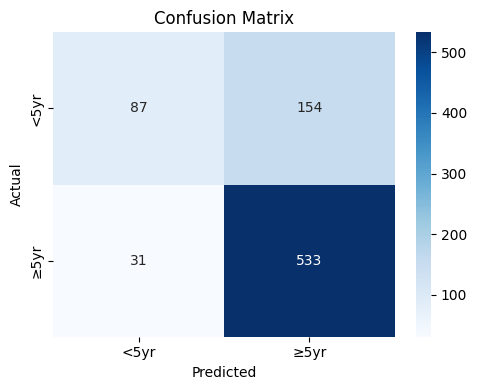

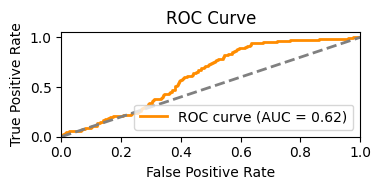

In [145]:
y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)[:, 1]

print(" Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<5yr', '≥5yr'], yticklabels=['<5yr', '≥5yr'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4,2))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Identify categorical and numeric columns

In [146]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

## Preprocessing: OneHotEncode categoricals, passthrough numerics

In [147]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])

## Encode features

In [148]:
X_encoded = preprocessor.fit_transform(X)

## Get feature names after encoding

In [149]:
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = list(ohe_feature_names) + numeric_cols

## Evaluated Logistic Regression using selected top features by training, testing, and reporting accuracy, F1-score, ROC-AUC, and generating a ROC curve plot.

In [150]:
def evaluate_model(X_data, selected_feature_indices, feature_names):
    X_sel = X_data[:, selected_feature_indices]
    
    X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42, stratify=y)
     
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"Selected Features ({len(selected_feature_indices)}): {[feature_names[i] for i in selected_feature_indices]}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(4,2))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Select top 10 features

In [151]:
selector_10 = SelectKBest(score_func=f_classif, k=10)
selector_10.fit(X_encoded, y)
top10_indices = selector_10.get_support(indices=True)

## Evaluate on top 10 features

Selected Features (10): ['N Stage_N1', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIIC', 'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Positive', 'Status_Alive', 'Status_Dead', 'Reginol Node Positive']
Accuracy: 0.770
F1-score: 0.852
ROC-AUC: 0.625

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805



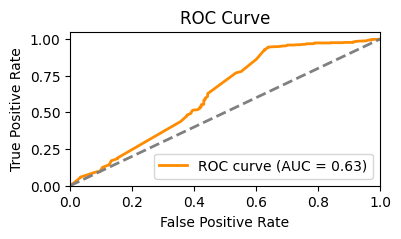

In [152]:
evaluate_model(X_encoded, top10_indices, all_feature_names)

## Select top 5 features

In [153]:
selector_5 = SelectKBest(score_func=f_classif, k=5)
selector_5.fit(X_encoded, y)
top5_indices = selector_5.get_support(indices=True)

## Evaluate on top 5 features

Selected Features (5): ['N Stage_N3', '6th Stage_IIIC', 'Status_Alive', 'Status_Dead', 'Reginol Node Positive']
Accuracy: 0.770
F1-score: 0.852
ROC-AUC: 0.650

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805



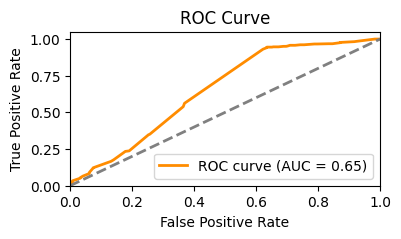

In [154]:
evaluate_model(X_encoded, top5_indices, all_feature_names)

## Feature Selection and Logistic Regression with Hyperparameter Tuning

Logistic Regression - Top 10 Features
Best Params: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805

ROC-AUC Score: 0.6269165121685647

Logistic Regression - Top 5 Features
Best Params: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805

ROC-AUC Score: 0.6304074335658162


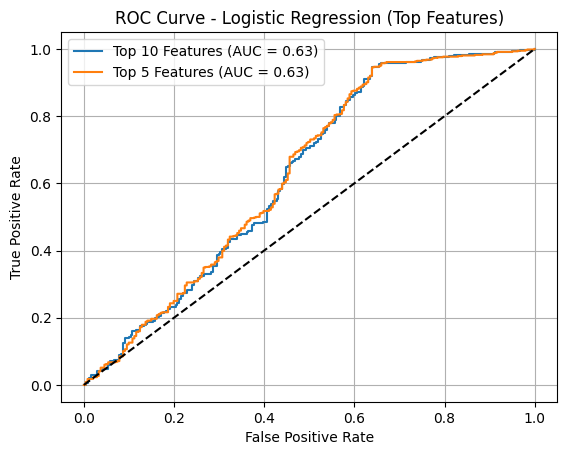

In [155]:
#  Feature Importance using Random Forest 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

#  Select Top Features 
top10_features = feat_importances.sort_values(ascending=False).head(10).index
top5_features = feat_importances.sort_values(ascending=False).head(5).index

X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]

X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

# Logistic Regression with Hyperparameter Tuning 
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Evaluate Top 10 Features 
grid_lr.fit(X_train_top10, y_train)
y_pred_top10 = grid_lr.predict(X_test_top10)
y_prob_top10 = grid_lr.predict_proba(X_test_top10)[:, 1]

print("Logistic Regression - Top 10 Features")
print("Best Params:", grid_lr.best_params_)
print(classification_report(y_test, y_pred_top10))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_top10))

# Plot ROC Curve - Top 10
fpr10, tpr10, _ = roc_curve(y_test, y_prob_top10)
plt.plot(fpr10, tpr10, label='Top 10 Features (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_top10)))

#  Evaluate Top 5 Features 
grid_lr.fit(X_train_top5, y_train)
y_pred_top5 = grid_lr.predict(X_test_top5)
y_prob_top5 = grid_lr.predict_proba(X_test_top5)[:, 1]

print("\nLogistic Regression - Top 5 Features")
print("Best Params:", grid_lr.best_params_)
print(classification_report(y_test, y_pred_top5))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_top5))
    
# Plot ROC Curve - Top 5
fpr5, tpr5, _ = roc_curve(y_test, y_prob_top5)
plt.plot(fpr5, tpr5, label='Top 5 Features (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_top5)))

# Final ROC Curve 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Top Features)')
plt.legend()
plt.grid(True)
plt.show()

## Cross-Validation ROC Curve Analysis

In [164]:
def plot_cv_roc_with_metrics(X, y, feature_set_name, metrics_summary):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    pipeline = make_pipeline(
        StandardScaler(),
        LogisticRegression(**grid_lr.best_params_, max_iter=1000, random_state=42)
    )

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    plt.figure(figsize=(6, 4))

    for i, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

        pipeline.fit(X_train_cv, y_train_cv)
        y_proba = pipeline.predict_proba(X_val_cv)[:, 1]

        fpr, tpr, _ = roc_curve(y_val_cv, y_proba)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

        plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {i+1} AUC = {roc_auc:.2f}')

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, color='b',
             label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})',
             lw=2)

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Display metrics in title 
    plt.title(f'ROC Curve - {feature_set_name}\n'
              f'Accuracy: {metrics_summary["accuracy"]}  '
              f'F1: {metrics_summary["f1"]}  '
              f'AUC: {metrics_summary["roc_auc"]} ')

    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Summary metrics for top 10 features and for top 5 features

In [165]:
metrics_top10 = {
    "accuracy": 0.7711,
    "accuracy_std": 0.0138,
    "f1": 0.8522,
    "f1_std": 0.0082,
    "roc_auc": 0.6517,
    "roc_auc_std": 0.0235
}

metrics_top5 = {
    "accuracy": 0.7711,
    "accuracy_std": 0.0138,
    "f1": 0.8522,
    "f1_std": 0.0082,
    "roc_auc": 0.6539,
    "roc_auc_std": 0.0216
}


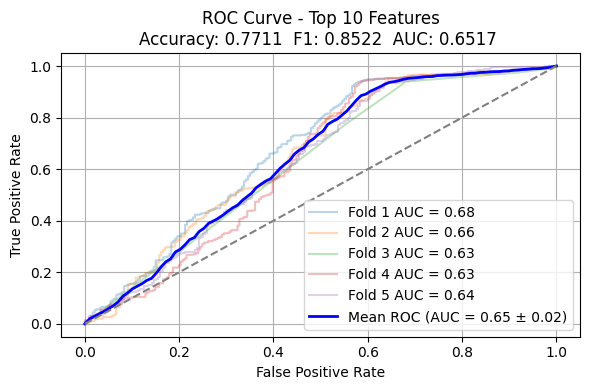

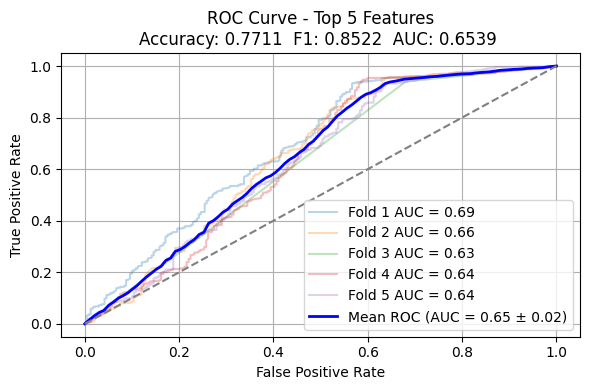

In [166]:
plot_cv_roc_with_metrics(X_all[top10_features], y_all, "Top 10 Features", metrics_top10)
plot_cv_roc_with_metrics(X_all[top5_features], y_all, "Top 5 Features", metrics_top5)